In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib, seaborn
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime

#estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Feature Importance
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

#cross validation
from sklearn.model_selection import train_test_split


In [2]:
flights = pd.read_csv('flights.csv', low_memory=False, header=0)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

# Data pre-processing

In [5]:
flightsJFK = flights[flights.DESTINATION_AIRPORT.eq('JFK')]
flightsJFK.shape

(93809, 31)

In [6]:
print(flightsJFK['ORIGIN_AIRPORT'].value_counts())

LAX    12015
SFO     8440
MCO     5346
BOS     5044
SJU     4466
       ...  
EGE      110
HYA       83
PSP       32
JAC        4
EWR        1
Name: ORIGIN_AIRPORT, Length: 65, dtype: int64


#Filtering airports with very small sampling (less that 2% of total flights)

In [7]:
airportCounts = flightsJFK['ORIGIN_AIRPORT'].value_counts()
filteredCounts = airportCounts[airportCounts >= 2345]
flightsJFKF = flightsJFK[flightsJFK['ORIGIN_AIRPORT'].isin(filteredCounts.index)]

In [8]:
print(flightsJFKF['ORIGIN_AIRPORT'].value_counts())

LAX    12015
SFO     8440
MCO     5346
BOS     5044
SJU     4466
FLL     4432
LAS     3705
MIA     3596
CLT     2574
TPA     2550
BUF     2461
Name: ORIGIN_AIRPORT, dtype: int64


Converting Month + Day into week of the year for less overall categorical features

In [9]:
def weekYear(x):
    week = datetime.date(2015, x['MONTH'], x['DAY']).isocalendar()[1]
    return week

In [10]:
flightsJFKF['WEEK']= flightsJFKF.apply(weekYear, axis=1)
#3weekYear(flightsJFKF['MONTH'],flightsJFKF['DAY'])

C:\Users\arang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Removing columns that are not relevant or that are emtpy for the use case

In [11]:
del flightsJFKF['YEAR']
del flightsJFKF['MONTH']
del flightsJFKF['DAY']
del flightsJFKF['FLIGHT_NUMBER']
del flightsJFKF['DEPARTURE_TIME']
del flightsJFKF['DEPARTURE_DELAY']
del flightsJFKF['TAXI_OUT']
del flightsJFKF['WHEELS_OFF']
del flightsJFKF['ELAPSED_TIME']
del flightsJFKF['AIR_TIME']
del flightsJFKF['WHEELS_ON']
del flightsJFKF['TAXI_IN']
del flightsJFKF['ARRIVAL_TIME']
del flightsJFKF['ARRIVAL_DELAY']
del flightsJFKF['DIVERTED']
del flightsJFKF['CANCELLATION_REASON']
del flightsJFKF['AIR_SYSTEM_DELAY']
del flightsJFKF['SECURITY_DELAY']
del flightsJFKF['AIRLINE_DELAY']
del flightsJFKF['LATE_AIRCRAFT_DELAY']
del flightsJFKF['WEATHER_DELAY']
del flightsJFKF['TAIL_NUMBER']
del flightsJFKF['DESTINATION_AIRPORT']


In [12]:
flightsJFKF.isnull().sum()

DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
CANCELLED              0
WEEK                   0
dtype: int64

In [13]:
def timeBlock(x):
        if x < 600:
            return 1
        elif x < 1200:
            return 2
        elif x < 1800:
            return 3
        else:
            return 4
flightsJFKF['SCHEDULED_DEPARTURE']= flightsJFKF['SCHEDULED_DEPARTURE'].apply(timeBlock)

C:\Users\arang\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
flightsJFKF['SCHEDULED_ARRIVAL']= flightsJFKF['SCHEDULED_ARRIVAL'].apply(timeBlock)

C:\Users\arang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
print(flightsJFKF['AIRLINE'].value_counts())

B6    20261
DL    14522
AA    12050
VX     3639
UA     3287
US      870
Name: AIRLINE, dtype: int64


In [16]:
replace_map = {'AIRLINE': {'AA': 1, 'B6': 2, 'DL': 3,'UA': 4 , 'US': 5,'VX': 6}}
flightsJFKF.replace(replace_map, inplace=True)

C:\Users\arang\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [17]:
replace_map_or = {'ORIGIN_AIRPORT': {'LAX': 1, 'SFO': 2, 'MCO': 3,'BOS': 4 , 'SJU': 5,'FLL': 6, 'LAS': 7, 'MIA': 8, 'CLT': 9 , 'TPA': 10,'BUF': 11}}
flightsJFKF.replace(replace_map_or, inplace=True)

In [18]:
cols_to_order = ['DAY_OF_WEEK', 'WEEK']
new_columns = cols_to_order + (flightsJFKF.columns.drop(cols_to_order).tolist())
flightsJFKF = flightsJFKF[new_columns]

In [19]:
flightsJFKF.head()

,DAY_OF_WEEK,WEEK,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
39,4,1,2,5,1,235.0,1598,1,0
95,4,1,2,11,1,88.0,301,2,0
122,4,1,2,4,1,77.0,187,2,0
239,4,1,2,10,2,151.0,1005,2,0
256,4,1,3,4,2,80.0,187,2,0


# END OF DATA PRE-PROCESING

# CORRELATION AND COVARIANCE

In [20]:
flightsCorr = flightsJFKF.corr()
print(flightsCorr)

                     DAY_OF_WEEK      WEEK   AIRLINE  ORIGIN_AIRPORT  \
DAY_OF_WEEK             1.000000 -0.031951 -0.005564        0.008934   
WEEK                   -0.031951  1.000000 -0.054208        0.009210   
AIRLINE                -0.005564 -0.054208  1.000000       -0.157343   
ORIGIN_AIRPORT          0.008934  0.009210 -0.157343        1.000000   
SCHEDULED_DEPARTURE     0.002209 -0.001282  0.006290        0.029855   
SCHEDULED_TIME         -0.011000 -0.005872  0.232078       -0.642845   
DISTANCE               -0.010206 -0.009592  0.249660       -0.638505   
SCHEDULED_ARRIVAL       0.001604 -0.014907 -0.038635       -0.001876   
CANCELLED              -0.033673 -0.114505 -0.013443        0.026692   

                     SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
DAY_OF_WEEK                     0.002209       -0.011000 -0.010206   
WEEK                           -0.001282       -0.005872 -0.009592   
AIRLINE                         0.006290        0.232078  0.249660   

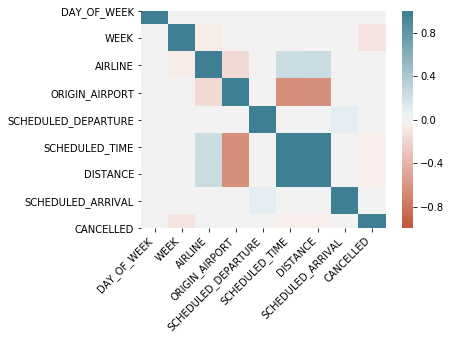

In [21]:
ax = sns.heatmap(
    flightsCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
covMat = flightsJFKF.cov()
print(covMat)

                     DAY_OF_WEEK        WEEK     AIRLINE  ORIGIN_AIRPORT  \
DAY_OF_WEEK             4.010810   -0.945906   -0.014555        0.055452   
WEEK                   -0.945906  218.525584   -1.046664        0.421968   
AIRLINE                -0.014555   -1.046664    1.706030       -0.636939   
ORIGIN_AIRPORT          0.055452    0.421968   -0.636939        9.605393   
SCHEDULED_DEPARTURE     0.003709   -0.015884    0.006888        0.077576   
SCHEDULED_TIME         -2.095735   -8.258754   28.838349     -189.542216   
DISTANCE              -17.803490 -123.502087  284.024858    -1723.602350   
SCHEDULED_ARRIVAL       0.003171   -0.217582   -0.049825       -0.005742   
CANCELLED              -0.008920   -0.223884   -0.002322        0.010942   

                     SCHEDULED_DEPARTURE  SCHEDULED_TIME       DISTANCE  \
DAY_OF_WEEK                     0.003709       -2.095735     -17.803490   
WEEK                           -0.015884       -8.258754    -123.502087   
AIRLINE       

# EDA

In [23]:
flightsJFKF['DAY_OF_WEEK'] = flightsJFKF['DAY_OF_WEEK'].astype('category')
flightsJFKF['WEEK'] = flightsJFKF['WEEK'].astype('category')
flightsJFKF['AIRLINE'] = flightsJFKF['AIRLINE'].astype('category')
flightsJFKF['ORIGIN_AIRPORT'] = flightsJFKF['ORIGIN_AIRPORT'].astype('category')
flightsJFKF['SCHEDULED_DEPARTURE'] = flightsJFKF['SCHEDULED_DEPARTURE'].astype('category')
flightsJFKF['SCHEDULED_ARRIVAL'] = flightsJFKF['SCHEDULED_ARRIVAL'].astype('category')
flightsJFKF['CANCELLED'] = flightsJFKF['CANCELLED'].astype('category')

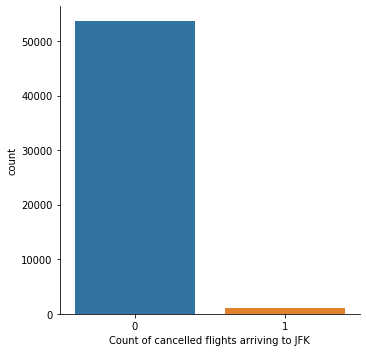

In [24]:
fg = sns.catplot('CANCELLED', data=flightsJFKF, kind='count')
fg.set_xlabels('Count of cancelled flights arriving to JFK')

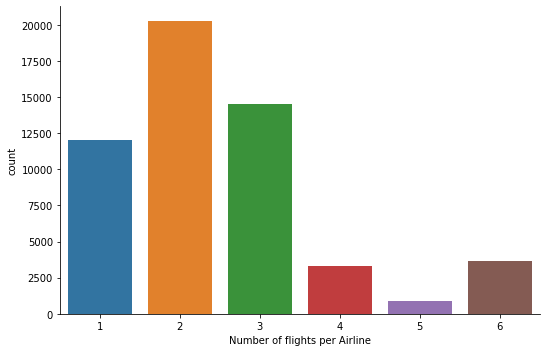

In [25]:
fg = sns.catplot('AIRLINE', data=flightsJFKF, kind='count', aspect=1.5)
fg.set_xlabels('Number of flights per Airline')

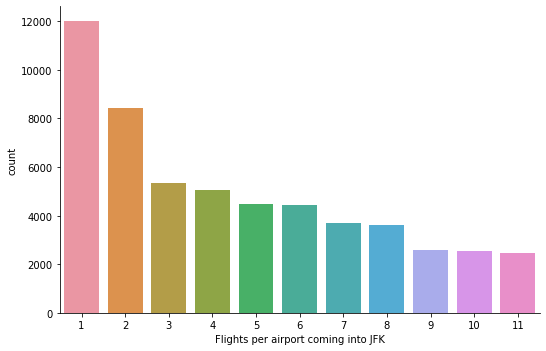

In [26]:
fg = sns.catplot('ORIGIN_AIRPORT', data=flightsJFKF, kind='count', aspect=1.5)
fg.set_xlabels('Flights per airport coming into JFK')

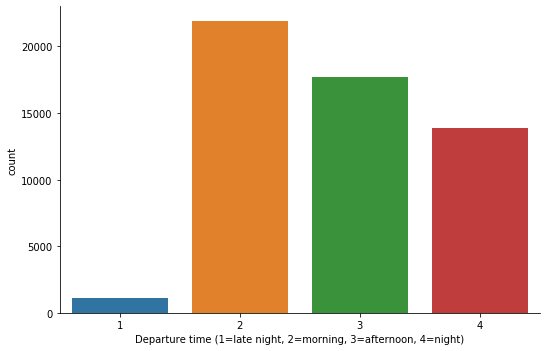

In [27]:
fg = sns.catplot('SCHEDULED_DEPARTURE', data=flightsJFKF, kind='count', aspect=1.5)
fg.set_xlabels('Departure time (1=late night, 2=morning, 3=afternoon, 4=night)')

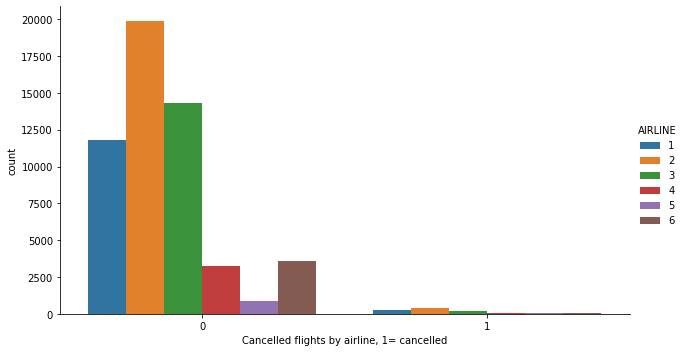

In [28]:
g = sns.catplot('CANCELLED', data=flightsJFKF, hue='AIRLINE', kind='count', aspect=1.75)
g.set_xlabels('Cancelled flights by airline, 1= cancelled')

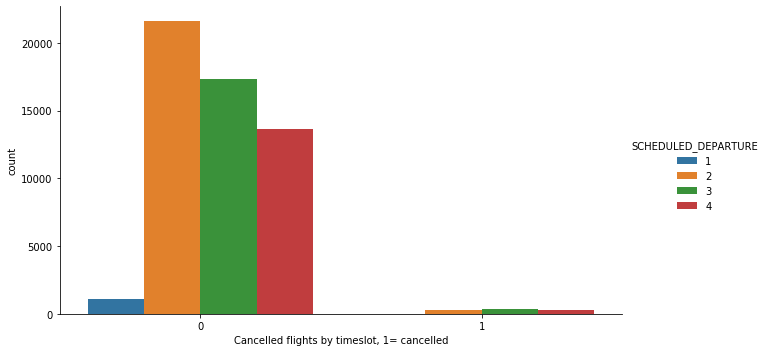

In [29]:
g = sns.catplot('CANCELLED', data=flightsJFKF, hue='SCHEDULED_DEPARTURE', kind='count', aspect=1.75)
g.set_xlabels('Cancelled flights by timeslot, 1= cancelled')

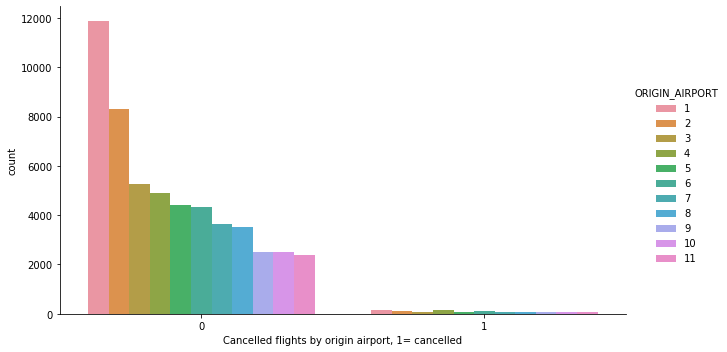

In [30]:
g = sns.catplot('CANCELLED', data=flightsJFKF, hue='ORIGIN_AIRPORT', kind='count', aspect=1.75)
g.set_xlabels('Cancelled flights by origin airport, 1= cancelled')

# RFE

In [31]:
X = flightsJFKF.drop('CANCELLED', axis=1)
target = flightsJFKF['CANCELLED']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [32]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 8


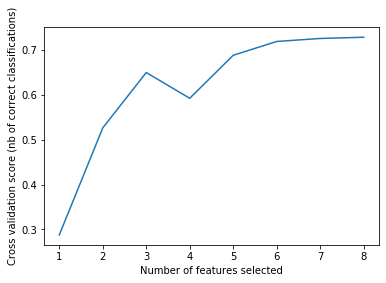

In [33]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

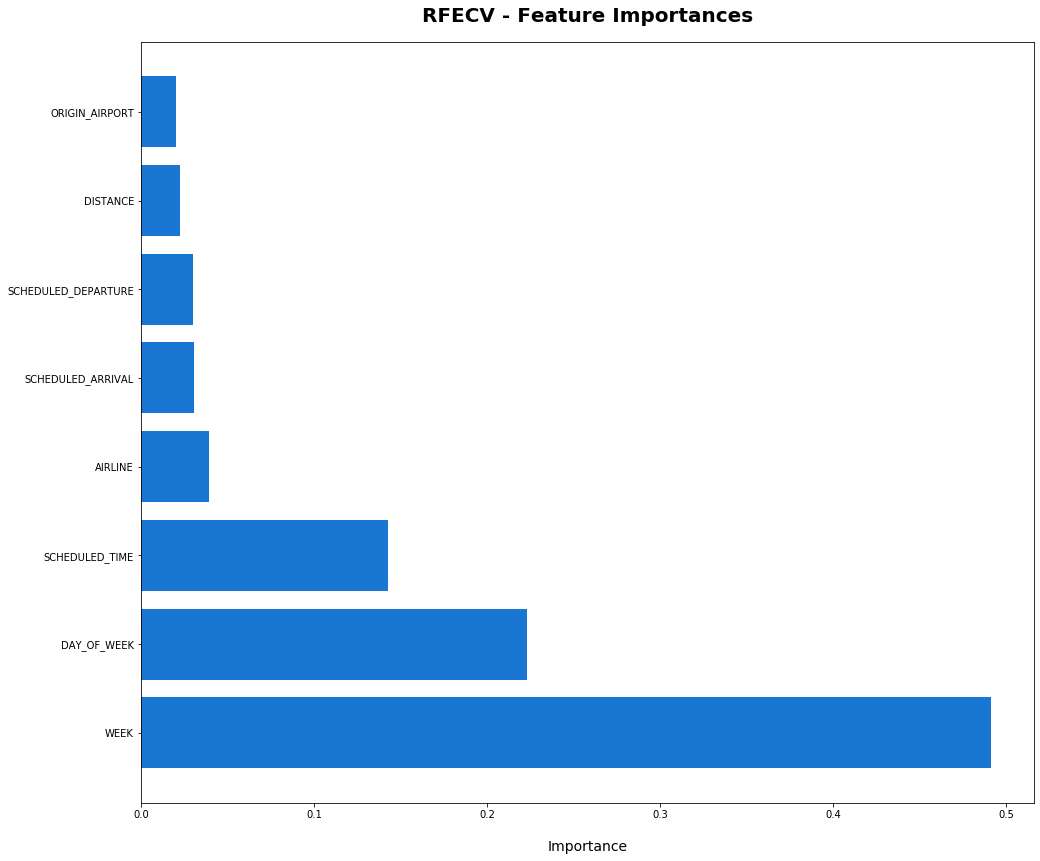

In [34]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

# MODELING

In [35]:
flightsJFKF.shape

(54629, 9)

In [36]:
#features
features = flightsJFKF.iloc[:,0:8]
print('Summary of feature sample')
features.head()

Summary of feature sample


,DAY_OF_WEEK,WEEK,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
39,4,1,2,5,1,235.0,1598,1
95,4,1,2,11,1,88.0,301,2
122,4,1,2,4,1,77.0,187,2
239,4,1,2,10,2,151.0,1005,2
256,4,1,3,4,2,80.0,187,2


In [37]:
depVar = flightsJFKF['CANCELLED']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40971, 8), (13658, 8), (40971,), (13658,))

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.98


In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of log regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of log regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of log regression classifier on training set: 0.98
Accuracy of log regression classifier on test set: 0.98


In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.98


# PARAMETER TUNING

# LOGISTIC REGRESSION

In [42]:
logreg1 = LogisticRegression(penalty = 'l2', C = 0.1,random_state = 0)

logreg1.fit(X_train,y_train)
print(cross_val_score(logreg1, X_train, y_train)) 
logreg1.score(X_train,y_train)

print('Accuracy of Log regression classifier on training set: {:.2f}'
     .format(logreg1.score(X_train, y_train)))
print('Accuracy of Log regression classifier on test set: {:.2f}'
     .format(logreg1.score(X_test, y_test)))

C:\Users\arang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[0.98255034 0.98267025 0.98267025 0.98267025 0.98254821]
Accuracy of Log regression classifier on training set: 0.98
Accuracy of Log regression classifier on test set: 0.98


In [43]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth= 90)

rf1.fit(X_train, y_train)
print(cross_val_score(rf1, X_train, y_train)) 
rf1.score(X_train,y_train)

print('Accuracy of RF1 classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))
print('Accuracy of RF1 classifier on test set: {:.2f}'
     .format(rf1.score(X_test, y_test)))

[0.98425869 0.98364657 0.98352453 0.98364657 0.98376861]
Accuracy of RF1 classifier on training set: 1.00
Accuracy of RF1 classifier on test set: 0.98


In [44]:
knn1 = KNeighborsClassifier(n_neighbors=7, leaf_size= 3)

knn1.fit(X_train, y_train)
print(cross_val_score(knn1, X_train, y_train)) 
knn1.score(X_train,y_train)

print('Accuracy of KNN1 classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print('Accuracy of KNN1 classifier on test set: {:.2f}'
     .format(knn1.score(X_test, y_test)))

[0.98206223 0.98267025 0.98254821 0.98218208 0.98206004]
Accuracy of KNN1 classifier on training set: 0.98
Accuracy of KNN1 classifier on test set: 0.98


All the models show extremely high accuracy, however due to the marked inbalance in the dataset for the dependant variable classes, accuracy is a not an approapite measure of model performance.

# PERFORMANCE METRICS FOR INBALANCED DATASETS

To better guage the performance of the algorithms we will use the ROC metric, plus the f-1 and recall metrics for the 3 models

# Random Forest

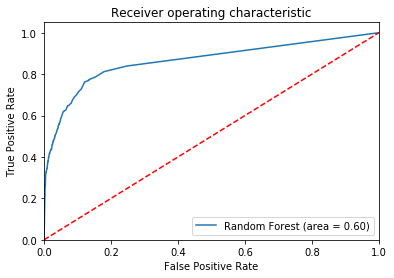

In [45]:
rf_roc_auc = roc_auc_score(y_test, rf1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
y_pred = rf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13397
           1       0.65      0.20      0.31       261

    accuracy                           0.98     13658
   macro avg       0.82      0.60      0.65     13658
weighted avg       0.98      0.98      0.98     13658



In [47]:
f1_score(y_test, y_pred)

0.3099415204678363

In [48]:
recall_score(y_test, y_pred)

0.20306513409961685

We can see there is a rather low precision score and very low recall and f1-score for the {1} class which is the one we are interested in predicting. We will try the oversampling method to improve the performance metrics

In [49]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [50]:
count_class_0, count_class_1 = flightsJFKF['CANCELLED'].value_counts()
df_class_0 = flightsJFKF[flightsJFKF['CANCELLED'] == 0]
df_class_1 = flightsJFKF[flightsJFKF['CANCELLED'] == 1]

Random over-sampling:
1    53656
0    53656
Name: CANCELLED, dtype: int64


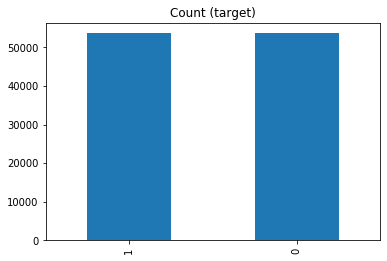

In [51]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['CANCELLED'].value_counts())

df_test_over['CANCELLED'].value_counts().plot(kind='bar', title='Count (target)');

In [52]:
y_train = df_test_over['CANCELLED']
X_train = df_test_over.iloc[:,0:8]

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((107312, 8), (13658, 8), (107312,), (13658,))

In [54]:
rf2 = RandomForestClassifier(n_estimators=300, max_depth= 90)

rf2.fit(X_train, y_train)
print(cross_val_score(rf2, X_train, y_train)) 
rf2.score(X_train,y_train)

print('Accuracy of RF2 classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))
print('Accuracy of RF2 classifier on test set: {:.2f}'
     .format(rf2.score(X_test, y_test)))

[0.51833388 0.86996226 0.9597894  0.94133818 0.63046314]
Accuracy of RF2 classifier on training set: 1.00
Accuracy of RF2 classifier on test set: 1.00


In [55]:
predictions = rf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13397
           1       0.98      1.00      0.99       261

    accuracy                           1.00     13658
   macro avg       0.99      1.00      0.99     13658
weighted avg       1.00      1.00      1.00     13658



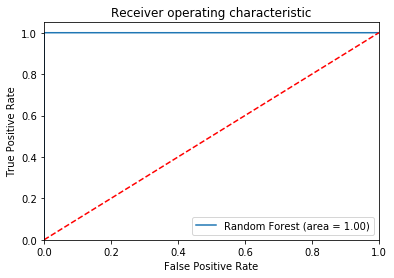

In [56]:
rf_roc_auc = roc_auc_score(y_test, rf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,13391,6
1,0,261


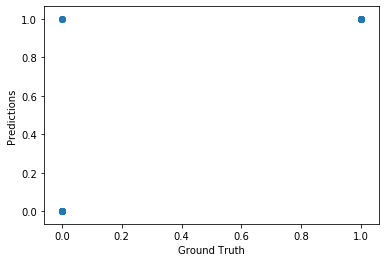

In [58]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();